In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import os
from tqdm.notebook import tqdm
from pathlib import Path
from rdkit import Chem

# ============================================
# Output Directory & Save Helper
# ============================================
output_dir = Path("../data/output/figures/decoy_comparison")
output_dir.mkdir(parents=True, exist_ok=True)

def save_figure(fig, filename, formats=['svg', 'png', 'pdf']):
    """
    Save matplotlib figure in multiple formats.
    
    Args:
        fig: matplotlib figure object
        filename: base filename (without extension)
        formats: list of formats to save (default: svg, png, pdf)
    """
    for fmt in formats:
        out_path = output_dir / f"{filename}.{fmt}"
        fig.savefig(out_path, format=fmt, dpi=300, bbox_inches='tight')
        print(f"✓ Saved: {out_path}")

print(f"Figures will be saved to: {output_dir.absolute()}")

Figures will be saved to: /Users/aoxu/projects/PLATE-VS/notebooks/../data/output/figures/decoy_comparison


In [2]:
# Load Actives
actives_path = '/Users/aoxu/projects/PLATE-VS/data/chembl_affinity/uniprot_O14684/O14684_chembl_activities_filtered.parquet'
df_actives = pd.read_parquet(actives_path)

# Load Decoys
decoys_path = '/Users/aoxu/projects/PLATE-VS/data/chembl_affinity/uniprot_O14684/deepcoy_output_test/O14684_generated_decoys.txt'
df_decoys = pd.read_csv(decoys_path, sep=' ', header=None, names=['active_smiles', 'decoy_smiles'])

print(f"Loaded {len(df_actives)} actives and {len(df_decoys)} decoy pairs.")

from rdkit.Chem import Descriptors

def calculate_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return pd.Series({
            'MW': Descriptors.MolWt(mol),
            'LogP': Descriptors.MolLogP(mol),
            'HBD': Descriptors.NumHDonors(mol),
            'HBA': Descriptors.NumHAcceptors(mol),
            'TPSA': Descriptors.TPSA(mol),
            'RotBonds': Descriptors.NumRotatableBonds(mol)
        })
    return pd.Series([None]*6, index=['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotBonds'])

# Calculate properties for Actives (using canonical_smiles from parquet if available, else check columns)
# Let's check columns of df_actives first
print("Actives columns:", df_actives.columns)


Loaded 2018 actives and 100 decoy pairs.
Actives columns: Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value',
       'assay_descripti

Using 'canonical_smiles' as SMILES column for actives.


Calculating Active Properties:   0%|          | 0/1639 [00:00<?, ?it/s]

Calculated properties for 1639 unique actives.


Calculating Decoy Properties:   0%|          | 0/100 [00:00<?, ?it/s]

Calculated properties for 1639 unique actives and 100 unique decoys.


/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_55840/379583275.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_props, x='Type', y=prop, ax=axes[i], inner='quartile',
/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_55840/379583275.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_props, x='Type', y=prop, ax=axes[i], inner='quartile',
/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_55840/379583275.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_props, x='Type', y=p

✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_violin.svg
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_violin.png
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_violin.png
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_violin.pdf
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_violin.pdf


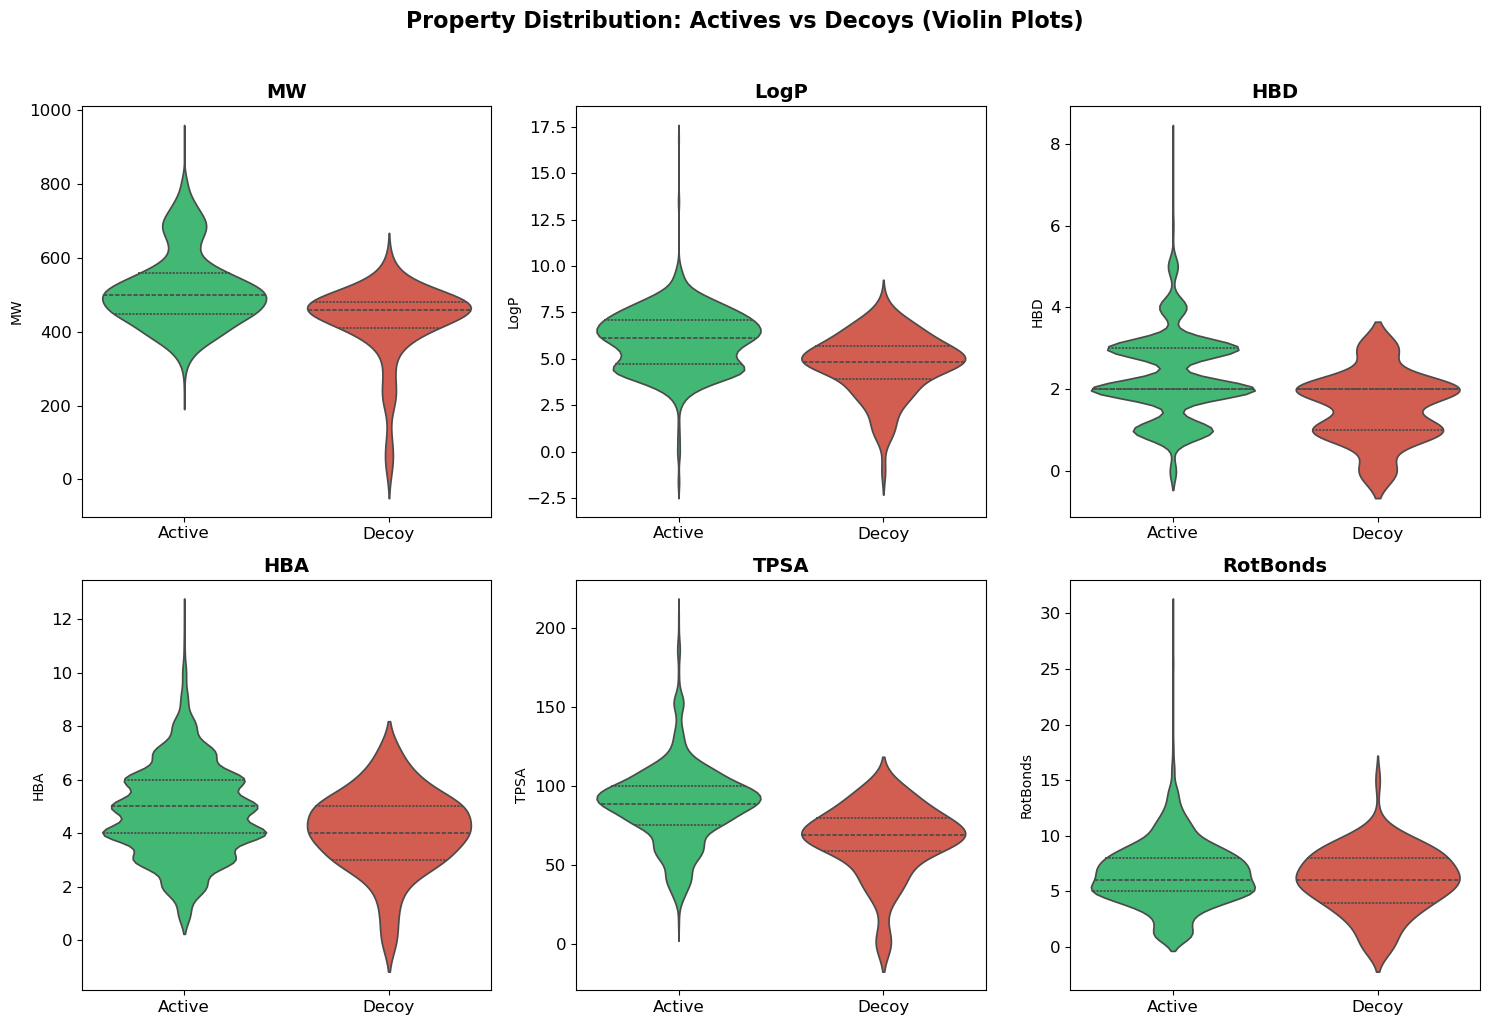

✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_cdf.svg
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_cdf.png
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_cdf.png
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_cdf.pdf
✓ Saved: ../data/output/figures/decoy_comparison/actives_vs_decoys_cdf.pdf


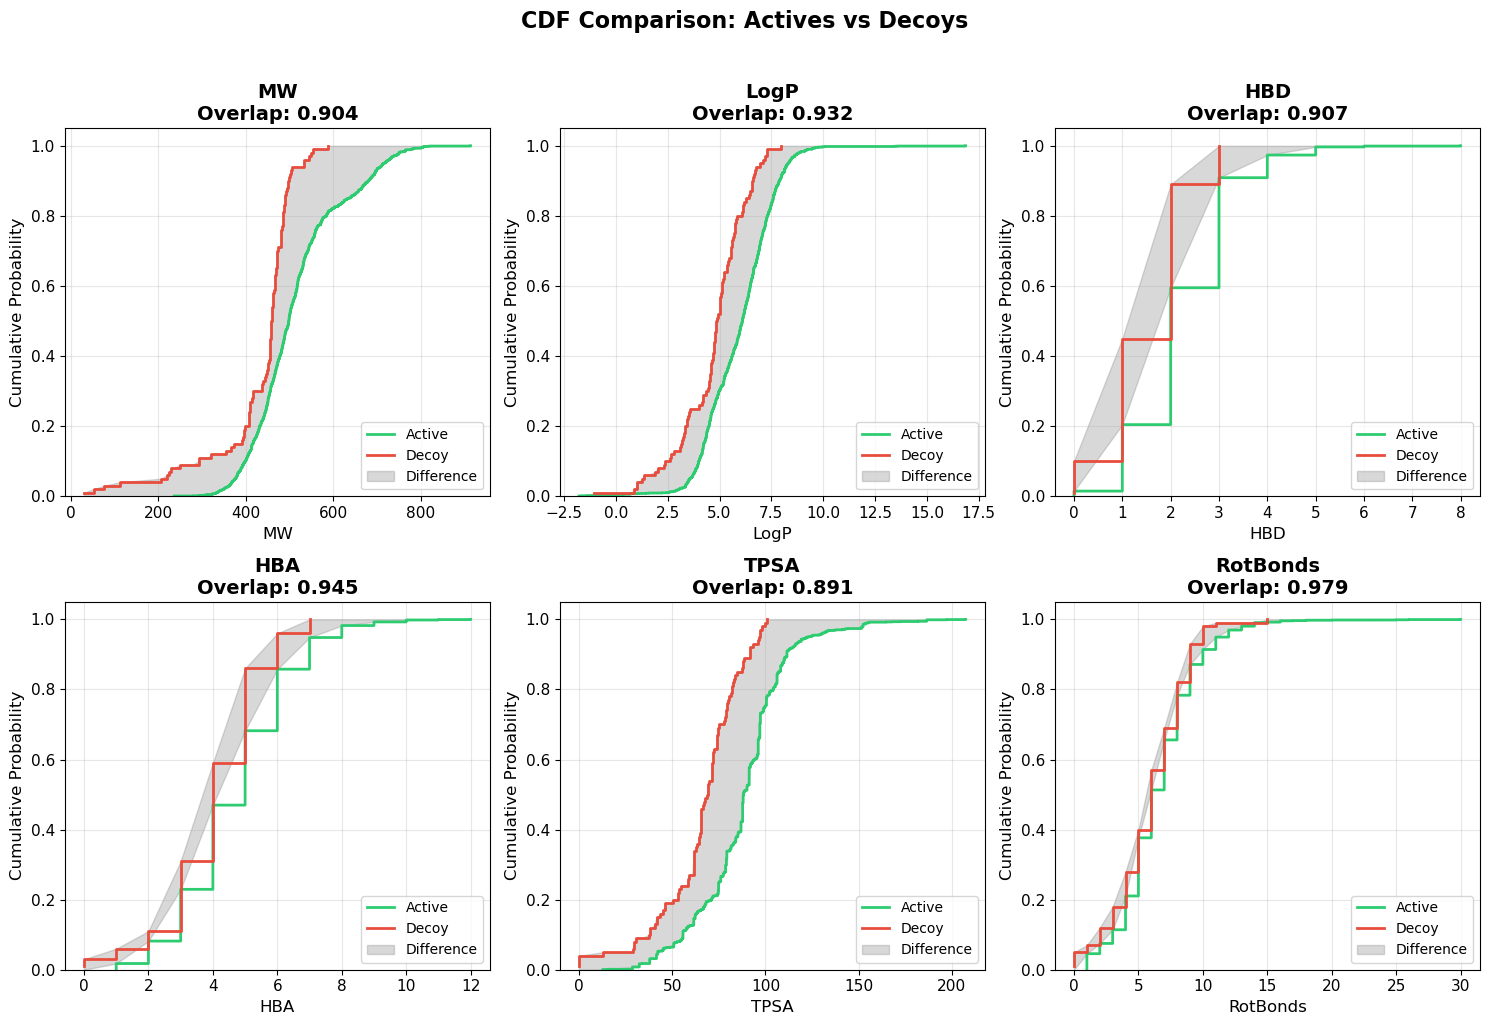


=== Property Overlap Summary ===
MW        : Overlap = 0.904 (1.0 = identical, 0.0 = no overlap)
LogP      : Overlap = 0.932 (1.0 = identical, 0.0 = no overlap)
HBD       : Overlap = 0.907 (1.0 = identical, 0.0 = no overlap)
HBA       : Overlap = 0.945 (1.0 = identical, 0.0 = no overlap)
TPSA      : Overlap = 0.891 (1.0 = identical, 0.0 = no overlap)
RotBonds  : Overlap = 0.979 (1.0 = identical, 0.0 = no overlap)
TPSA      : Overlap = 0.891 (1.0 = identical, 0.0 = no overlap)
RotBonds  : Overlap = 0.979 (1.0 = identical, 0.0 = no overlap)


In [3]:
# Identify SMILES column in df_actives
smiles_col = 'canonical_smiles' if 'canonical_smiles' in df_actives.columns else 'smiles'
if smiles_col not in df_actives.columns:
    # Fallback: try to find a column that looks like smiles
    for col in df_actives.columns:
        if 'smiles' in col.lower():
            smiles_col = col
            break

print(f"Using '{smiles_col}' as SMILES column for actives.")

# Calculate properties for unique actives
tqdm.pandas(desc="Calculating Active Properties")
unique_actives = df_actives[smiles_col].drop_duplicates()
df_actives_props = unique_actives.progress_apply(calculate_properties)
df_actives_props['Type'] = 'Active'
print(f"Calculated properties for {len(df_actives_props)} unique actives.")

# Calculate properties for unique decoys
tqdm.pandas(desc="Calculating Decoy Properties")
unique_decoys = df_decoys['decoy_smiles'].drop_duplicates()
df_decoys_props = unique_decoys.progress_apply(calculate_properties)
df_decoys_props['Type'] = 'Decoy'
print(f"Calculated properties for {len(df_actives_props)} unique actives and {len(df_decoys_props)} unique decoys.")

# Combine
df_props = pd.concat([df_actives_props, df_decoys_props], ignore_index=True)

properties = ['MW', 'LogP', 'HBD', 'HBA', 'TPSA', 'RotBonds']

# ============================================
# Plot 1: Violin Plots
# ============================================
fig1, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, prop in enumerate(properties):
    sns.violinplot(data=df_props, x='Type', y=prop, ax=axes[i], inner='quartile',
                   palette={'Active': '#2ecc71', 'Decoy': '#e74c3c'})
    axes[i].set_title(prop, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].tick_params(labelsize=12)

plt.suptitle('Property Distribution: Actives vs Decoys (Violin Plots)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save figure
save_figure(fig1, 'actives_vs_decoys_violin')
plt.show()

# ============================================
# Plot 2: CDF Plots with Overlap
# ============================================

# Calculate CDF overlap coefficient
def calculate_cdf_overlap(data1, data2, n_bins=1000):
    """Calculate the overlap area between two CDFs (ranges from 0 to 1)."""
    # Remove NaN values
    data1 = data1.dropna()
    data2 = data2.dropna()
    
    if len(data1) == 0 or len(data2) == 0:
        return np.nan
    
    # Create common x-axis range
    min_val = min(data1.min(), data2.min())
    max_val = max(data1.max(), data2.max())
    x = np.linspace(min_val, max_val, n_bins)
    
    # Calculate CDFs
    cdf1 = np.array([np.sum(data1 <= xi) / len(data1) for xi in x])
    cdf2 = np.array([np.sum(data2 <= xi) / len(data2) for xi in x])
    
    # Calculate overlap as 1 - area between curves (normalized)
    # Area between CDFs ranges from 0 (identical) to 1 (completely separated)
    area_between = np.trapz(np.abs(cdf1 - cdf2), x) / (max_val - min_val)
    overlap = 1 - area_between
    
    return overlap

fig2, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, prop in enumerate(properties):
    ax = axes[i]
    
    # Get data for each type
    active_data = df_props[df_props['Type'] == 'Active'][prop].dropna()
    decoy_data = df_props[df_props['Type'] == 'Decoy'][prop].dropna()
    
    # Sort for CDF plotting
    active_sorted = np.sort(active_data)
    decoy_sorted = np.sort(decoy_data)
    
    # Calculate CDF values
    active_cdf = np.arange(1, len(active_sorted) + 1) / len(active_sorted)
    decoy_cdf = np.arange(1, len(decoy_sorted) + 1) / len(decoy_sorted)
    
    # Plot CDFs
    ax.step(active_sorted, active_cdf, where='post', label='Active', color='#2ecc71', linewidth=2)
    ax.step(decoy_sorted, decoy_cdf, where='post', label='Decoy', color='#e74c3c', linewidth=2)
    
    # Fill the area between CDFs to show difference
    # Create common x-axis for filling
    all_vals = np.sort(np.concatenate([active_sorted, decoy_sorted]))
    active_cdf_interp = np.searchsorted(active_sorted, all_vals, side='right') / len(active_sorted)
    decoy_cdf_interp = np.searchsorted(decoy_sorted, all_vals, side='right') / len(decoy_sorted)
    
    ax.fill_between(all_vals, active_cdf_interp, decoy_cdf_interp, 
                    alpha=0.3, color='gray', label='Difference')
    
    # Calculate overlap
    overlap = calculate_cdf_overlap(active_data, decoy_data)
    
    ax.set_title(f'{prop}\nOverlap: {overlap:.3f}', fontsize=14, fontweight='bold')
    ax.set_xlabel(prop, fontsize=12)
    ax.set_ylabel('Cumulative Probability', fontsize=12)
    ax.legend(loc='lower right', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)
    ax.tick_params(labelsize=11)

plt.suptitle('CDF Comparison: Actives vs Decoys', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save figure
save_figure(fig2, 'actives_vs_decoys_cdf')
plt.show()

# Print summary of overlaps
print("\n=== Property Overlap Summary ===")
for prop in properties:
    active_data = df_props[df_props['Type'] == 'Active'][prop]
    decoy_data = df_props[df_props['Type'] == 'Decoy'][prop]
    overlap = calculate_cdf_overlap(active_data, decoy_data)
    print(f"{prop:10s}: Overlap = {overlap:.3f} (1.0 = identical, 0.0 = no overlap)")

Calculating Shape Similarity:   0%|          | 0/100 [00:00<?, ?it/s]

✓ Saved: ../data/output/figures/decoy_comparison/shape_similarity_distribution.svg
✓ Saved: ../data/output/figures/decoy_comparison/shape_similarity_distribution.png
✓ Saved: ../data/output/figures/decoy_comparison/shape_similarity_distribution.pdf
✓ Saved: ../data/output/figures/decoy_comparison/shape_similarity_distribution.pdf


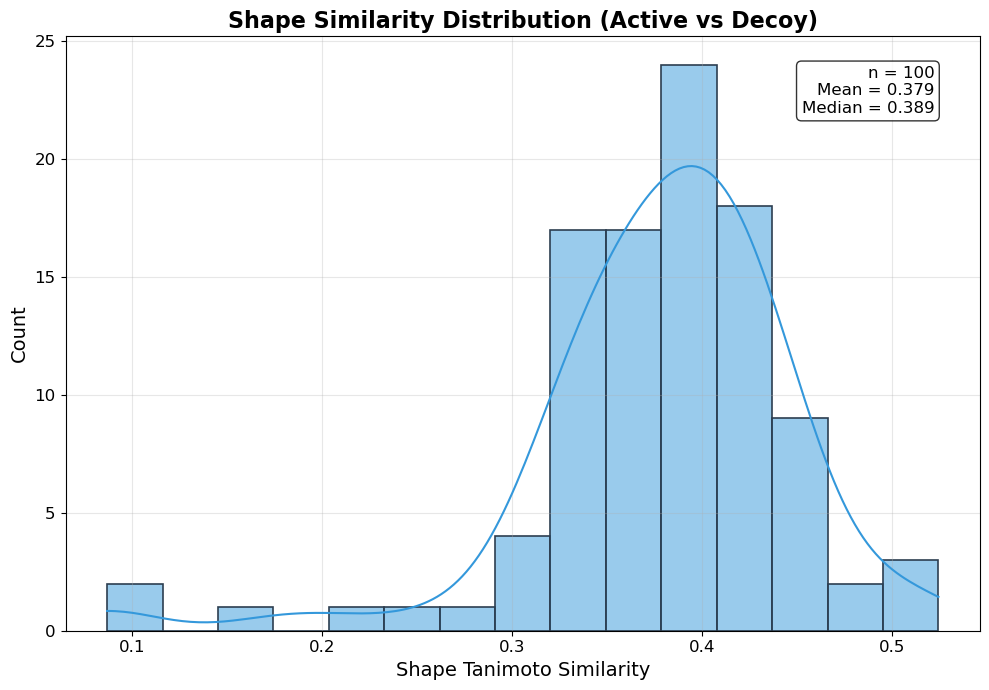


=== Shape Similarity Statistics ===
Valid samples: 100 / 100
Mean:   0.379
Median: 0.389
Std:    0.070
Min:    0.087
Max:    0.524


In [4]:
from rdkit.Chem import AllChem, rdShapeAlign, rdShapeHelpers

def calculate_shape_similarity(row):
    smi1, smi2 = row['active_smiles'], row['decoy_smiles']
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    
    if not mol1 or not mol2:
        return None
        
    mol1 = Chem.AddHs(mol1)
    mol2 = Chem.AddHs(mol2)
    
    # Generate conformers
    params = AllChem.ETKDGv3()
    params.useSmallRingTorsions = True
    
    # Embed
    res1 = AllChem.EmbedMolecule(mol1, params)
    res2 = AllChem.EmbedMolecule(mol2, params)
    
    if res1 == -1 or res2 == -1:
        return None
        
    # Align mol2 (probe) to mol1 (ref)
    try:
        # AlignMol modifies mol2 in place to align with mol1s
        rdShapeAlign.AlignMol(mol1, mol2)
        
        # Calculate Tanimoto Shape Distance (0 is identical, 1 is different)
        dist = rdShapeHelpers.ShapeTanimotoDist(mol1, mol2)
        return 1.0 - dist # Similarity
    except Exception as e:
        return None

# Calculate for a subset if too many
tqdm.pandas(desc="Calculating Shape Similarity")
# Taking a sample of 100 for speed in demonstration
df_decoys_sample = df_decoys.sample(min(100, len(df_decoys))).copy()
df_decoys_sample['Shape_Similarity'] = df_decoys_sample.progress_apply(calculate_shape_similarity, axis=1)

# Plot
fig3, ax = plt.subplots(figsize=(10, 7))
sns.histplot(df_decoys_sample['Shape_Similarity'].dropna(), kde=True, ax=ax, 
             color='#3498db', edgecolor='#2c3e50', linewidth=1.2)
ax.set_title('Shape Similarity Distribution (Active vs Decoy)', fontsize=16, fontweight='bold')
ax.set_xlabel('Shape Tanimoto Similarity', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize=12)
ax.grid(True, alpha=0.3)

# Add statistics annotation
valid_similarities = df_decoys_sample['Shape_Similarity'].dropna()
if len(valid_similarities) > 0:
    stats_text = f"n = {len(valid_similarities)}\nMean = {valid_similarities.mean():.3f}\nMedian = {valid_similarities.median():.3f}"
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()

# Save figure
save_figure(fig3, 'shape_similarity_distribution')
plt.show()

# Print statistics
print(f"\n=== Shape Similarity Statistics ===")
print(f"Valid samples: {len(valid_similarities)} / {len(df_decoys_sample)}")
if len(valid_similarities) > 0:
    print(f"Mean:   {valid_similarities.mean():.3f}")
    print(f"Median: {valid_similarities.median():.3f}")
    print(f"Std:    {valid_similarities.std():.3f}")
    print(f"Min:    {valid_similarities.min():.3f}")
    print(f"Max:    {valid_similarities.max():.3f}")